# FINDING PROXIES FOR CLIMATE VS CHANGE

In [3]:
!pip install nltk

import nltk
!nltk.download('all')
from nltk.corpus import wordnet as wn

/bin/bash: -c: line 0: syntax error near unexpected token `'all''
/bin/bash: -c: line 0: `nltk.download('all')'


In [7]:
### Generate synonyms and hyponyms using Wordnet

def generate_wordnet_list(word_base,languages,exclude_list):
  word_lists = []

  #iterate over languages
  for language in languages:
    word_list = []

    # iterate over words in the word_base list
    for word in word_base:

      ## iterate over different meanings of the word synsets
      for meaning in wn.synsets(word, pos=wn.NOUN+wn.VERB+wn.ADJ):
        if meaning.name() not in exclude_list:
          print(meaning)
          print(meaning.definition())
          print('\n')


          ## iterate over different synonyms and add them to list
          for synonym in meaning.lemmas(language):
            #print(synonym)

            ## if the synonym is no in the list add it
            if synonym.name() not in word_list:
              word_list.append(synonym.name())
              #print(synonym.name())

          ## iterate over hyponyms
          for hyponym in meaning.hyponyms():
            #print(hyponym.lemmas(language))

            ## iterate over synonyms of hyponyms
            for synonym_of_hyponym in hyponym.lemmas(language):
              #print(synonym_of_hyponym.name())

              ## if the synonym of the hyponym is no in the list add it
              if synonym_of_hyponym.name() not in word_list:
                word_list.append(synonym_of_hyponym.name())

    ## add the language-specific word list to the global word list, sort the words in alphabetic order   
    word_lists +=[sorted(word_list)]

  ## there are 3 lists now, one for each language, we iterate over the list of lists and print each
  for lst in word_lists:
    print(lst)
    return(lst)

In [8]:
from gensim.models.word2vec import Word2Vec
import os
from os import path

## This function organizes corpus as list of sentences, and each sentence as a list of words,
## as input to the function WordVec

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## This will be a list of clean sentences
word2vec_input = []

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:
        if '.txt' in file and 'model' not in file:
            print(file)
            name = os.path.join(path, file)
        
            file_text = open(name, encoding = 'unicode_escape').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                word2vec_input += [paragraph.split(' ')]
            
                #print(word2vec_input)

/content
li etal-2010-hybrid solar electricity system.txt
varo-2013-Design.txt
Christian etal-2009-predictingdomestic.txt
Shanmugapriya etal-2018-solar linear fresnel.txt
riffat-2017-Overview.txt
jiang etal-2013- Design and performan.txt
tham-2011-Energy.txt
Zhang etal-2015-heat transfer of energy.txt
Zheng-2018-solar.txt
yadav etal-2020-Sustainable.txt
bANSAL-2009-evaporative cooling.txt
li etal-2019-Effect of design.txt
khoshbazan etal-2018-Thermo economic analy.txt
hegazy-2020-Toward efficient energy con.txt
d'alessandro etal-2016-Innovative concretes for low carbon constructions.txt
Zhang etal-2016-indoor air thermal.txt
ong-2011-Experimental.txt
jian yao-2012-Effect.txt
mohamed-2011-Exploring.txt
lim etal-2013-Design config.txt
aydin etal-2015-Numerical analysis of solar.txt
jorge-2010-linear Fresnel.txt
Ge etal-2009-water absorption.txt
Mojtaba-2018-natural.txt
eloka and onunka-2020-Sustainable.txt
chien-2014-Assessment.txt
ONG-2016-Reviewofsolar.txt
shattat-2012-Water.txt
gan-20

In [9]:
## Here we build the vector space with Word2Vec

SentenceCorpus = word2vec_input
word2vec_output = Word2Vec(SentenceCorpus, min_count=1)

In [10]:
## Save vector space

word2vec_output.save('w2v_model.txt')

In [11]:
###  funtion to use word2vec to inquiry about the 20 most similar semantically words to each seed word in word_list

def get_word2vec_list(word_list,model):

  list_of_word2vec_lists = []
  for word in word_list:
    try:

      ## here is the crucial line - we are using the model that we trained to get the most similar words within our corpus
      list_vects=model.wv.most_similar([word],topn=10)

      new_list = []
      new_list +=[word]
      for item in list_vects:
        word1 = item[0]
        new_list += [word1]

      #print(new_list)
      #print('\n')
      list_of_word2vec_lists += [new_list]


    
    except KeyError:
      continue
  return(list_of_word2vec_lists)

In [12]:
## open vector space for english in the early modern period
model = Word2Vec.load('w2v_model.txt')


In [13]:
## checking for word similarities with the semantic vector space
print('change==',(model.wv.similarity('climate','change')))
print('adaptation==',(model.wv.similarity('climate','adaptation')))
print('mitigation==',(model.wv.similarity('climate','mitigation')))
print('threat==',(model.wv.similarity('climate','threat')))
print('conflict==',(model.wv.similarity('climate','damage')))
print('damage==',(model.wv.similarity('climate','adaptation')))
print('conservation==',(model.wv.similarity('climate','conservation')))
print('biodiversity==',(model.wv.similarity('climate','biodiversity')))

change== 0.60761744
adaptation== 0.75175655
mitigation== 0.62589866
threat== 0.6668814
conflict== 0.5733161
damage== 0.75175655
conservation== 0.3885659
biodiversity== 0.43905815


In [14]:
## Setting the proxies
print('climateVSthreat==',(model.wv.similarity('climate','threat')))
print('adaptationVSconflict==',(model.wv.similarity('adaptation','conflict')))
print('mitigationVSdamage==',(model.wv.similarity('mitigation','damage')))

print('\n')
print('climate==',(model.wv.most_similar(['climate'], topn = 40)))
print('adaptation==',(model.wv.most_similar(['adaptation'], topn = 40)))
print('mitigation==',(model.wv.most_similar(['mitigation'], topn = 40)))
print('threat==',(model.wv.most_similar(['threat'], topn = 40)))
print('conflict==',(model.wv.most_similar(['conflict'], topn = 40)))
print('damage==',(model.wv.most_similar(['damage'], topn = 40)))

climateVSthreat== 0.6668814
adaptationVSconflict== 0.6547048
mitigationVSdamage== 0.6773985


climate== [('human', 0.8079093098640442), ('health', 0.7833635807037354), ('environment', 0.7764713168144226), ('UHI', 0.7755396366119385), ('political', 0.7752680778503418), ('regional', 0.7741379737854004), ('local', 0.7625917196273804), ('environmental', 0.7605990767478943), ('planning', 0.7601946592330933), ('issues', 0.7529126405715942), ('adaptation', 0.7517566680908203), ('limate', 0.7466807961463928), ('urban', 0.74379962682724), ('risk', 0.7421473264694214), ('living', 0.7417421340942383), ('policy', 0.7410329580307007), ('future', 0.7346386313438416), ('social', 0.7344570755958557), ('overheating', 0.7333933115005493), ('international', 0.7312231659889221), ('sustainability', 0.7310340404510498), ('global', 0.7263492345809937), ('policies', 0.7254267930984497), ('concerns', 0.7243906259536743), ('microclimate', 0.7241517305374146), ('infectious', 0.7201499938964844), ('science', 0.71

In [15]:
## Setting the proxies
print('climateVSthreat==',(model.wv.similarity('climate','threat')))
print('adaptationVSconflict==',(model.wv.similarity('adaptation','conflict')))
print('mitigationVSdamage==',(model.wv.similarity('mitigation','damage')))

climateVSthreat== 0.6668814
adaptationVSconflict== 0.6547048
mitigationVSdamage== 0.6773985


In [16]:
## proxies of change
print('change_threat==',(model.wv.similarity('change','threat')))
print('change_conflict==',(model.wv.similarity('change','conflict')))
print('change_damage==',(model.wv.similarity('change','damage')))
print('change_loss==',(model.wv.similarity('change','loss')))
print('change_degradation==',(model.wv.similarity('change','degradation')))


change_threat== 0.5900352
change_conflict== 0.51082283
change_damage== 0.59056497
change_loss== 0.52558196
change_degradation== 0.6791321


In [17]:
## Examples of uses of the semantic vector space
print('change==',(model.wv.similarity('climate','change')))
print('adaptation==',(model.wv.similarity('climate','adaptation')))
print('mitigation==',(model.wv.similarity('climate','mitigation')))
print('environment==',(model.wv.similarity('climate','environment')))
print('ecosystem==',(model.wv.similarity('climate','ecosystem')))
print('weather==',(model.wv.similarity('climate','weather')))

change== 0.60761744
adaptation== 0.75175655
mitigation== 0.62589866
environment== 0.7764713
ecosystem== 0.56329584
weather== 0.63991964


FOR CLIMATE:
- climate
- adaptation
- mitigation
- environment
- ecosytem
- weather

FOR CHANGE: 
- change
- threat
- conflict
- damage
- loss
- degradation

In [18]:
## Setting the WORDS together
print('climateVSchange==',(model.wv.similarity('climate','change')))
print('adaptationVSconflict==',(model.wv.similarity('adaptation','conflict')))
print('mitigationVSdamage==',(model.wv.similarity('mitigation','damage')))
print('environmentVdegradation==',(model.wv.similarity('environment','degradation')))
print('ecosystemVSloss==',(model.wv.similarity('ecosystem','loss')))
print('weatherVSthreat==',(model.wv.similarity('weather','threat')))

climateVSchange== 0.60761744
adaptationVSconflict== 0.6547048
mitigationVSdamage== 0.6773985
environmentVdegradation== 0.8059582
ecosystemVSloss== 0.27004424
weatherVSthreat== 0.44201177


In [19]:
# Generating seed words for the proxies
print('climate==',(model.wv.most_similar(['climate'], topn = 40)))
print('adaptation==',(model.wv.most_similar(['adaptation'], topn = 40)))
print('mitigation==',(model.wv.most_similar(['mitigation'], topn = 40)))
print('ecosystem==',(model.wv.most_similar(['ecosystem'], topn = 40)))
print('environment==',(model.wv.most_similar(['environment'], topn = 40)))
print('weather==',(model.wv.most_similar(['weather'], topn = 40)))



print('change==',(model.wv.most_similar(['change'], topn = 40)))
print('threat==',(model.wv.most_similar(['threat'], topn = 40)))
print('conflict==',(model.wv.most_similar(['conflict'], topn = 40)))
print('damage==',(model.wv.most_similar(['damage'], topn = 40)))
print('loss==',(model.wv.most_similar(['loss'], topn = 40)))
print('degradation==',(model.wv.most_similar(['degradation'], topn = 40)))

climate== [('human', 0.8079093098640442), ('health', 0.7833635807037354), ('environment', 0.7764713168144226), ('UHI', 0.7755396366119385), ('political', 0.7752680778503418), ('regional', 0.7741379737854004), ('local', 0.7625917196273804), ('environmental', 0.7605990767478943), ('planning', 0.7601946592330933), ('issues', 0.7529126405715942), ('adaptation', 0.7517566680908203), ('limate', 0.7466807961463928), ('urban', 0.74379962682724), ('risk', 0.7421473264694214), ('living', 0.7417421340942383), ('policy', 0.7410329580307007), ('future', 0.7346386313438416), ('social', 0.7344570755958557), ('overheating', 0.7333933115005493), ('international', 0.7312231659889221), ('sustainability', 0.7310340404510498), ('global', 0.7263492345809937), ('policies', 0.7254267930984497), ('concerns', 0.7243906259536743), ('microclimate', 0.7241517305374146), ('infectious', 0.7201499938964844), ('science', 0.7162206172943115), ('public', 0.7154042720794678), ('governance', 0.7132267951965332), ('risks',

In [20]:
# SEED WORDS FOR CREATING BAGS OF WORDS
climate = ['environment','climate','microclimate','vegetation','land','sustainability','diversity','global','regional','adaptation','living','local','health','human']
adaptation =['adaptation','planning','sustainability','mitigation','governance','future','plans','safety','awareness','measures','policies','initiatives','low-carbon','implementation','improvements','management','strategies','safety']
mitigation = ['mitigation','adaptation','sustainability','management','policy','strategies','environmental','safety','incentives','awareness','measures','practices',]
environment = ['environment','human','urban','local','traffic','regional','spaces','living','occupants','comfort','indoor','buildings','wetland','nature','construction']
weather = ['meteorological','climatic','sky','conditions','monitoring','geographical','locations','overcast']
ecosystem = ['populations','society','ecofriendly','settlements','eco-tourism','cultural','society']

In [21]:
# SEED WORDS FOR CREATING BAGS OF WORDS
change = ['change','transition','formation','reaction','rise']
threat = ['threat', 'challenge','disease','spread','serious','extent','hazardous','challenging','instability','conflict','damage','degradation','vulnerable','shortcomings','crucial']
conflict = ['disease','difficulties','destructive','negative','conflict']
damage = ['degradation','drastically','overheating','adverse','risks','exacerbate','risk','intensify','instability','deformation','strive','warming','cause','deterioration']
loss = ['losses','loss','stress','dissipation','destruction','irreversibility','removal','leakage','diffusion','lost','vaporisation','deformation','gap']
degradation = ['damage','deterioration','risk','poor','limits','limited','impact','degradation','deformation','overheating']

##Measuring adaptation in contrast with threat


In [50]:
adaptation =['adaptation','planning','sustainability','mitigation','governance','future','plans','safety','awareness','measures','policies','initiatives','low-carbon','implementation','improvements','management','strategies','safety']
print("Lenghth of list:", len(adaptation))
print("Used words:", adaptation)

Lenghth of list: 18
Used words: ['adaptation', 'planning', 'sustainability', 'mitigation', 'governance', 'future', 'plans', 'safety', 'awareness', 'measures', 'policies', 'initiatives', 'low-carbon', 'implementation', 'improvements', 'management', 'strategies', 'safety']


In [51]:
threat = ['threat', 'challenge','disease','spread','serious','extent','hazardous','challenging','instability','conflict','damage','degradation','vulnerable','shortcomings','crucial']
print("Lenghth of list:", len(threat))
print("Used words:", threat)

Lenghth of list: 15
Used words: ['threat', 'challenge', 'disease', 'spread', 'serious', 'extent', 'hazardous', 'challenging', 'instability', 'conflict', 'damage', 'degradation', 'vulnerable', 'shortcomings', 'crucial']


In [52]:
 import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
languages = ['eng']

exclude_list_adaptation = ['adaptation.n.01','design.v.04','future.n.03','future.s.03','plan.n.03','base_hit.n.01','condom.n.01','measurement.n.01','meter.n.03','measure.n.07','measuring_stick.n.01','measure.n.09','measure.v.01','quantify.v.02','measure.v.03','first_step.n.01','management.n.02','strategy.n.02','base_hit.n.01','condom.n.01','safety.n.06' ] 
adaptation_list = generate_wordnet_list(adaptation,languages,exclude_list_adaptation)

Synset('adaptation.n.02')
the process of adapting to something (such as environmental conditions)


Synset('adaptation.n.03')
(physiology) the responsive adjustment of a sense organ (as the eye) to varying conditions (as of light)


Synset('planning.n.01')
an act of formulating a program for a definite course of action


Synset('planning.n.02')
the act or process of drawing up plans or layouts for some project or enterprise


Synset('planning.n.03')
the cognitive process of thinking about what you will do in the event of something happening


Synset('plan.v.01')
have the will and intention to carry out some action


Synset('plan.v.02')
make plans for something


Synset('plan.v.03')
make or work out a plan for; devise


Synset('sustainability.n.01')
the property of being sustainable


Synset('extenuation.n.02')
to act in such a way as to cause an offense to seem less serious


Synset('extenuation.n.01')
a partial excuse to mitigate censure; an attempt to represent an offense as less ser

In [54]:
languages = ['eng']

exclude_list_threat =['challenge.n.03','challenge.n.04','challenge.n.05','challenge.v.01','challenge.v.02','challenge.v.03','challenge.v.04','ranch.n.01','spread.n.05','banquet.n.02','spread.n.07','spread.n.08','bedspread.n.01','spread.n.10','spread.v.01','unfold.v.04','outspread.s.01','good.s.16','unplayful.a.01','serious.s.06','extent.n.02','challenge.v.01','challenge.v.02','challenge.v.03','challenge.v.04','ambitious.s.02','challenging.s.02','battle.n.01''conflict.n.06','damage.n.02','price.n.02'  ]
threat_list = generate_wordnet_list(threat,languages,exclude_list_threat)

Synset('menace.n.01')
something that is a source of danger


Synset('threat.n.02')
a warning that something unpleasant is imminent


Synset('threat.n.03')
declaration of an intention or a determination to inflict harm on another


Synset('terror.n.02')
a person who inspires fear or dread


Synset('challenge.n.01')
a demanding or stimulating situation


Synset('challenge.n.02')
a call to engage in a contest or fight


Synset('disease.n.01')
an impairment of health or a condition of abnormal functioning


Synset('spread.n.01')
process or result of distributing or extending over a wide expanse of space


Synset('gap.n.01')
a conspicuous disparity or difference as between two figures


Synset('scatter.n.01')
a haphazard distribution in all directions


Synset('spread.v.02')
become distributed or widespread


Synset('spread.v.03')
spread across or over


Synset('circulate.v.02')
cause to become widely known


Synset('go_around.v.02')
become widely known and passed on


Synset('spread.v.07')

In [55]:
from gensim.models.word2vec import Word2Vec
import os
from os import path

## This function organizes corpus as list of sentences, and each sentence as a list of words,
## as input to the function WordVec

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## This will be a list of clean sentences
word2vec_input = []

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:
        if '.txt' in file and 'model' not in file:
            print(file)
            name = os.path.join(path, file)
        
            file_text = open(name, encoding = 'unicode_escape').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                word2vec_input += [paragraph.split(' ')]
            
                #print(word2vec_input)

/content
li etal-2010-hybrid solar electricity system.txt
varo-2013-Design.txt
Christian etal-2009-predictingdomestic.txt
Shanmugapriya etal-2018-solar linear fresnel.txt
riffat-2017-Overview.txt
jiang etal-2013- Design and performan.txt
tham-2011-Energy.txt
Zhang etal-2015-heat transfer of energy.txt
Zheng-2018-solar.txt
yadav etal-2020-Sustainable.txt
bANSAL-2009-evaporative cooling.txt
li etal-2019-Effect of design.txt
khoshbazan etal-2018-Thermo economic analy.txt
hegazy-2020-Toward efficient energy con.txt
d'alessandro etal-2016-Innovative concretes for low carbon constructions.txt
Zhang etal-2016-indoor air thermal.txt
ong-2011-Experimental.txt
jian yao-2012-Effect.txt
mohamed-2011-Exploring.txt
lim etal-2013-Design config.txt
aydin etal-2015-Numerical analysis of solar.txt
jorge-2010-linear Fresnel.txt
Ge etal-2009-water absorption.txt
Mojtaba-2018-natural.txt
eloka and onunka-2020-Sustainable.txt
chien-2014-Assessment.txt
ONG-2016-Reviewofsolar.txt
shattat-2012-Water.txt
gan-20

In [56]:
## Here we build the vector space with Word2Vec

SentenceCorpus = word2vec_input
word2vec_output = Word2Vec(SentenceCorpus, min_count=1)

In [57]:
## Save vector space

word2vec_output.save('w2v_model_hf.txt')

## Use the vector semantic map to evaluate if the bags of words created in are ecologically valid

In [58]:
###  funtion to use word2vec to inquiry about the 20 most similar semantically words to each seed word in word_list

def get_word2vec_list(word_list,model):

  list_of_word2vec_lists = []
  for word in word_list:
    try:

      ## here is the crucial line - we are using the model that we trained to get the most similar words within our corpus
      list_vects=model.wv.most_similar([word],topn=10)

      new_list = []
      new_list +=[word]
      for item in list_vects:
        #word1 = item[0]
        word1 = item
        new_list += [word1]

      #print(new_list)
      #print('\n')
      list_of_word2vec_lists += [new_list]


    
    except KeyError:
      continue
  return(list_of_word2vec_lists)

In [59]:
## open vector space 
model = Word2Vec.load('w2v_model_hf.txt')

In [60]:
## get word2vec words for adaptation
list_of_adaptation_w2v = get_word2vec_list(adaptation_list,model)

index =0
for w2v_list in list_of_adaptation_w2v:
  print(index, w2v_list)
  index +=1

0 ['ERA', ('Guangzhou.', 0.724992573261261), ('Midtropical', 0.7156827449798584), ('Responsive', 0.7140653729438782), ('Figures,', 0.7009973526000977), ('ESCWA', 0.6929574012756348), ('ROSS.', 0.6905686855316162), ('GCC.', 0.675757646560669), ('Entrepreneurship', 0.6655796766281128), ('2017;206:', 0.6647934913635254), ('(CENA),', 0.6620650887489319)]
1 ['GPA', ('\x0cS.-C.', 0.9761170148849487), ('shops,', 0.9758874773979187), ('C18:1,', 0.9746696949005127), ('(ppm)', 0.9737651348114014), ('Power/(W)', 0.9732383489608765), ('lobby', 0.9724339842796326), ('6598,', 0.9722500443458557), ('389', 0.9707000255584717), ('significance;', 0.9703866839408875), ('Stern,', 0.9701583385467529)]
2 ['abatement', ('openness,', 0.9304378032684326), ('Governance.', 0.9121769666671753), ('1\x03Ã°c1i', 0.9100913405418396), ('â\x88\x928', 0.9089756011962891), ('ethanol;', 0.908967137336731), ('Chen1,2,3*', 0.9086675643920898), ('Reducing', 0.9080814719200134), ('(Li', 0.907686710357666), ('Calculating', 0.9

In [61]:
## chose from the word2vec outputs, the lists that seem to have clouds of meanings coherent with adaptation
relevant_adaptation_w2v_words = list( list_of_adaptation_w2v[i] for i in [3,4,5,7,8,9,17,28,46,49,50,71,72,73,75,89,98,105,106,114,119,131,146,147,148,149,150,151,153,156,157,158,160,161,162,163,174,176,182,185,])


## Add all the words into one final bags of words
adaptation_BoW = [item for sublist in relevant_adaptation_w2v_words for item in sublist]

print(adaptation_BoW)


['acclimation', ('24-h', 0.8035394549369812), ('week', 0.7700808048248291), ('semi-industrial', 0.7620989680290222), ('60-day', 0.7557017207145691), ('CLP', 0.75130295753479), ('two-region', 0.745255708694458), ('362.91', 0.7450319528579712), ('38C,', 0.7450294494628906), ('~3500', 0.7424848079681396), ('Industrialization', 0.7382945418357849), 'acclimatisation', ('120Â°,', 0.7285768985748291), ('\x0258C;', 0.7257624864578247), ('uncompetitive.', 0.7111402750015259), ('NEPA', 0.6841458082199097), ('securitized?', 0.6775997877120972), ('5B).', 0.668194591999054), ('twofold:', 0.6656444668769836), ('99.21,', 0.6636466979980469), ('proposed,', 0.6633368134498596), ('achieved.', 0.657956063747406), 'accommodation', ('organization', 0.9139866828918457), ('student', 0.9135613441467285), ('vernacular', 0.9094411134719849), ('Member', 0.9076016545295715), ('decisions.', 0.9071551561355591), ('Tianjin,', 0.9054135084152222), ('town', 0.9030934572219849), ('history,', 0.9029749631881714), ('Guan

In [62]:
## get word2vec words for threat
list_of_threat_w2v = get_word2vec_list(threat_list,model)

index =0
for w2v_list in list_of_threat_w2v:
  print(index, w2v_list)
  index +=1

0 ['all-important', ('(early-)', 0.9271506071090698), ('BERS/MERS', 0.9257677793502808), ('Yuanlong', 0.9256170988082886), ('NP-1802,', 0.9203072786331177), ('Cui,', 0.9200453758239746), ('parliamentary', 0.9193521738052368), ('S.p.A.,', 0.9191786050796509), ('(Ministry', 0.9187525510787964), ('Delibera', 0.9186845421791077), ('XXI.', 0.9180070161819458)]
1 ['anthrax', ('snacks:', 0.9534900188446045), ('designersâ\x80\x99', 0.950007975101471), ('a2n', 0.9478705525398254), ('\x1a2', 0.946607768535614), ('2007;49:407', 0.9458480477333069), ('Cambiella', 0.9420889616012573), ('Ã¾CL1min', 0.9416152238845825), ('Javiar', 0.9411590099334717), ('â\x8e\x9eâ\x8e\x9fâ\x88\x92n', 0.9391301274299622), ('Renewal', 0.938590407371521)]
2 ['arguing', ('toleranceâ\x80\x94these', 0.8152986764907837), ('Chillers.', 0.8093464374542236), ('Deflections', 0.8046705722808838), ('centuries', 0.8012487292289734), ('TRYs', 0.7998015284538269), ('Pessenda:', 0.7991498708724976), ('normals', 0.7983794212341309), (

In [63]:
## chose from the word2vec outputs, the lists that seem to have clouds of meanings coherent with threat
relevant_threat_w2v_words = list( list_of_threat_w2v[i] for i in [20,28,29,30,31,33,35,40,46,48,63,64,65,66,67,68,71,86,93,94,98,102,104,108])


## Add all the words into one final bags of words
threat_BoW = [item for sublist in relevant_threat_w2v_words for item in sublist]

print(threat_BoW)

['conflict', ('CC', 0.8860970735549927), ('citizens', 0.878174901008606), ('inhabitants', 0.8709839582443237), ('disease', 0.8668217658996582), ('diseases', 0.865274965763092), ('lives', 0.8616675138473511), ('young', 0.859085202217102), ('humans', 0.8556236028671265), ('COVID-19', 0.8517391085624695), ('disastrous', 0.8486253023147583), 'damage', ('resist', 0.8802833557128906), ('exacerbate', 0.8658555746078491), ('hazardous', 0.8599640130996704), ('noise', 0.8579788208007812), ('prevent', 0.8521747589111328), ('promote', 0.8490594625473022), ('contributing', 0.8471541404724121), ('minimize', 0.8455061912536621), ('avoid', 0.8408823013305664), ('strengthen', 0.8407557606697083), 'dangerous', ('aquatic', 0.9273659586906433), ('dangers', 0.9237913489341736), ('Americaâ\x80\x99s', 0.9219803214073181), ('â\x80\x9cthe', 0.9170793890953064), ('cheapening', 0.9160662889480591), ('actor', 0.9142828583717346), ('diseases.', 0.9137831926345825), ('(08', 0.9129105806350708), ('openness,', 0.9120

## Frequency Analysis

In [64]:
## Here we collect the relevant data to generate a dataset with word frequencies
## For each text in the corpus, we collect author, year, title, and the tokenized text
import os
from os import path

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## this is a list which will store the relevant data to the dataframe
data_to_df =[]

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:

        ## list where we will store the relevant data for this text 
        text_data = []

        ## list in which we will stored tokenized text
        tokenized_text = []
        
        if '.txt' in file[-4:] and 'model' not in file:
            print(file)

            ## we can obtain author, year, title from filename
            author = file.split('-')[0]
            year = int(file.split('-')[1])
            title = file.split('-')[2]
            
            ## we get the full path and open the file
            name = os.path.join(path, file)
            file_text = open(name, encoding = 'utf-8',errors='ignore').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                tokenized_text += paragraph.split(' ')

            ## store relevant info into a variable
            text_data = [author,year,title,tokenized_text]

            ## store the relevant data of each text into a general list of lists
            data_to_df += [text_data]

/content
li etal-2010-hybrid solar electricity system.txt
varo-2013-Design.txt
Christian etal-2009-predictingdomestic.txt
Shanmugapriya etal-2018-solar linear fresnel.txt
riffat-2017-Overview.txt
jiang etal-2013- Design and performan.txt
tham-2011-Energy.txt
Zhang etal-2015-heat transfer of energy.txt
Zheng-2018-solar.txt
yadav etal-2020-Sustainable.txt
bANSAL-2009-evaporative cooling.txt
li etal-2019-Effect of design.txt
khoshbazan etal-2018-Thermo economic analy.txt
hegazy-2020-Toward efficient energy con.txt
d'alessandro etal-2016-Innovative concretes for low carbon constructions.txt
Zhang etal-2016-indoor air thermal.txt
ong-2011-Experimental.txt
jian yao-2012-Effect.txt
mohamed-2011-Exploring.txt
lim etal-2013-Design config.txt
aydin etal-2015-Numerical analysis of solar.txt
jorge-2010-linear Fresnel.txt
Ge etal-2009-water absorption.txt
Mojtaba-2018-natural.txt
eloka and onunka-2020-Sustainable.txt
chien-2014-Assessment.txt
ONG-2016-Reviewofsolar.txt
shattat-2012-Water.txt
gan-20

In [65]:
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data_to_df, columns = ['author', 'year','title','tokenized_text'])
  
# print dataframe.
df

,author,year,title,tokenized_text
0,li etal,2010,hybrid solar electricity system.txt,"[Novel, design, and, simulation, of, a, hybrid..."
1,varo,2013,Design.txt,"[Design, of, a, celestial, vault, image, captu..."
2,Christian etal,2009,predictingdomestic.txt,"[An, artificial, neural, network, for, predict..."
3,Shanmugapriya etal,2018,solar linear fresnel.txt,"[Performance, investigation, of, linear, evacu..."
4,riffat,2017,Overview.txt,"[Overview, of, working, fluids, and, sustainab..."
...,...,...,...,...
602,dakwale and ralegaonkar,2011,Review of carbon emission through buildings.txt,"[Review, of, carbon, emission, through, buildi..."
603,chen etal,2016,Modeling.txt,"[Modeling, and, performance, analyses, of, fin..."
604,oyieke,2018,Interfacial.txt,"[Interfacial, heat, and, mass, transfer, analy..."
605,wuetal,2020,Application.txt,[................................................


In [66]:
## Create a function to calculate word counts of a particular bag of words
from collections import Counter

def count_BOW(bag_of_words,tokenized_text):
  count_occurences_of_each_word = Counter(tokenized_text)
  #print(count_occurences_of_each_word)

  total_bag_count = 0
  for word in bag_of_words:
    #print(word, count_occurences_of_each_word[word])

    total_bag_count += count_occurences_of_each_word[word]
  return(total_bag_count)

In [67]:
## count all the words in each text pertaining to the bag of words adaptation and threat

list_adaptation_counts=[]
list_threat_counts=[]

for text in df['tokenized_text']:
  adaptation_count = count_BOW(adaptation_BoW, text)
  list_adaptation_counts+=[adaptation_count]

  threat_count = count_BOW(threat_BoW, text)
  list_threat_counts+=[threat_count]

In [68]:
## Add the counts of bags of words to the dataFrame

df['adaptation'] = list_adaptation_counts
df['threat'] = list_threat_counts

df

,author,year,title,tokenized_text,adaptation,threat
0,li etal,2010,hybrid solar electricity system.txt,"[Novel, design, and, simulation, of, a, hybrid...",1,0
1,varo,2013,Design.txt,"[Design, of, a, celestial, vault, image, captu...",1,0
2,Christian etal,2009,predictingdomestic.txt,"[An, artificial, neural, network, for, predict...",2,0
3,Shanmugapriya etal,2018,solar linear fresnel.txt,"[Performance, investigation, of, linear, evacu...",1,0
4,riffat,2017,Overview.txt,"[Overview, of, working, fluids, and, sustainab...",18,3
...,...,...,...,...,...,...
602,dakwale and ralegaonkar,2011,Review of carbon emission through buildings.txt,"[Review, of, carbon, emission, through, buildi...",12,0
603,chen etal,2016,Modeling.txt,"[Modeling, and, performance, analyses, of, fin...",5,0
604,oyieke,2018,Interfacial.txt,"[Interfacial, heat, and, mass, transfer, analy...",4,0
605,wuetal,2020,Application.txt,[................................................,4,0


In [69]:
df['adaptation-threat-ratio'] = (df['adaptation'] - df['threat'])/(df['adaptation'] + df['threat'])

df

,author,year,title,tokenized_text,adaptation,threat,adaptation-threat-ratio
0,li etal,2010,hybrid solar electricity system.txt,"[Novel, design, and, simulation, of, a, hybrid...",1,0,1.000000
1,varo,2013,Design.txt,"[Design, of, a, celestial, vault, image, captu...",1,0,1.000000
2,Christian etal,2009,predictingdomestic.txt,"[An, artificial, neural, network, for, predict...",2,0,1.000000
3,Shanmugapriya etal,2018,solar linear fresnel.txt,"[Performance, investigation, of, linear, evacu...",1,0,1.000000
4,riffat,2017,Overview.txt,"[Overview, of, working, fluids, and, sustainab...",18,3,0.714286
...,...,...,...,...,...,...,...
602,dakwale and ralegaonkar,2011,Review of carbon emission through buildings.txt,"[Review, of, carbon, emission, through, buildi...",12,0,1.000000
603,chen etal,2016,Modeling.txt,"[Modeling, and, performance, analyses, of, fin...",5,0,1.000000
604,oyieke,2018,Interfacial.txt,"[Interfacial, heat, and, mass, transfer, analy...",4,0,1.000000
605,wuetal,2020,Application.txt,[................................................,4,0,1.000000


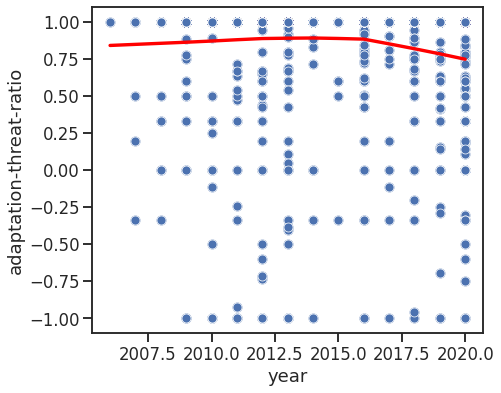

In [70]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


#%matplotlib inline
sns.set()
sns.set_context("talk")
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df, lowess=True, line_kws={"color": "red"}, x="year", y="adaptation-threat-ratio")
sns.scatterplot(data=df, x="year", y="adaptation-threat-ratio", ci=None)